<a href="https://colab.research.google.com/github/oneoftwo/generative_model_tutorials/blob/main/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative Adverserial Network**

## **Import and Download Dataset**

In [8]:
import numpy as np
import random as random
import time as time
from tqdm import tqdm

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F


from matplotlib import pyplot as plt
from matplotlib import cm


In [9]:
#==============================================================================#
# excecute ====================================================================#
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

from torchvision import datasets, transforms
batch_size = 16
download_root = './MNIST_DATASET'
train_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
    train=True, download=True)
test_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
    train=False, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, \
    shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, \
    shuffle=True, drop_last=True)
#==============================================================================#


## **Utils**

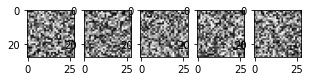

In [10]:
################################################################################
# utils ########################################################################

def plot_10(x):
        fig = plt.figure(figsize=(10, 30))
        for idx in range(5):
            img = x[idx].cpu().squeeze().detach().numpy()
            ax = fig.add_subplot(1, 10, idx + 1)
            ax.imshow(img, cmap=cm.gray)
        plt.show()

################################################################################


#==============================================================================#
# sanity check ================================================================#
plot_10(torch.rand(20, 1, 28, 28))
#==============================================================================#


## **Model**
Generative adverserial network

In [11]:
################################################################################
# GAN ##########################################################################

def sampler(batch_size, z_dim):
    z = torch.randn(batch_size, z_dim)
    return z

# GAN generator
class Generator(nn.Module):
    
    def __init__(self, z_dim=2):
        super().__init__()
        self.fc = nn.Sequential(\
                nn.Linear(z_dim, 128), \
                nn.SiLU(), \
                nn.Linear(128, 256), \
                nn.SiLU(), \
                nn.Linear(256, 512), \
                nn.SiLU(), \
                nn.Linear(512, 28 * 28))
        
    def forward(self, z):
        b = z.size(0)
        x = self.fc(z)
        x = x.view(b, 1, 28, 28)
        x = torch.sigmoid(x)
        return x


# GAN discriminaotr, CNN based classifier
class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(\
                nn.Linear(28 * 28, 128), \
                nn.ReLU(), \
                nn.Linear(128, 64), \
                nn.ReLU(), \
                nn.Linear(64, 1))
        
    def forward(self, x):
        b = x.size(0)
        x = x.reshape(b, -1)
        x = self.fc(x)
        x = torch.sigmoid(x).squeeze()
        return x

################################################################################


#==============================================================================#
# sanity check ================================================================#
g = Generator()
d = Discriminator()
z = sampler(32, 2)
print(z.size())
print(g(z).size())
print(d(g(z)).size())
#==============================================================================#


torch.Size([32, 2])
torch.Size([32, 1, 28, 28])
torch.Size([32])


## **Train**

100%|██████████| 3750/3750 [00:32<00:00, 115.03it/s]


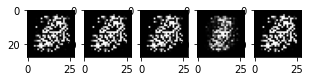

26129.49922001362 632.5258923965168


100%|██████████| 3750/3750 [00:32<00:00, 114.78it/s]


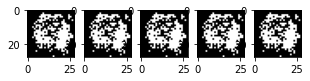

16214.059971392155 907.8794119171671


100%|██████████| 3750/3750 [00:32<00:00, 114.94it/s]


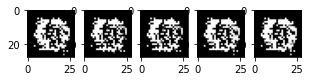

22799.549812555313 585.2624325518622


100%|██████████| 3750/3750 [00:32<00:00, 114.75it/s]


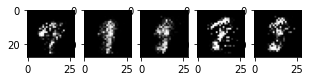

15452.003538489342 1199.798216211926


100%|██████████| 3750/3750 [00:32<00:00, 114.90it/s]


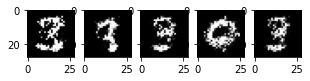

9346.582692623138 2277.739695366472


100%|██████████| 3750/3750 [00:32<00:00, 114.48it/s]


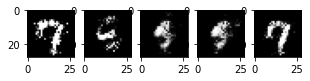

6720.879117906094 2859.809965953231


100%|██████████| 3750/3750 [00:32<00:00, 114.88it/s]


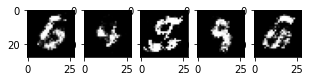

5289.8723576664925 3354.406898021698


100%|██████████| 3750/3750 [00:32<00:00, 114.22it/s]


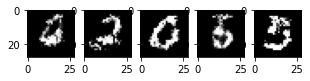

5082.777698278427 3476.623535901308


100%|██████████| 3750/3750 [00:32<00:00, 114.31it/s]


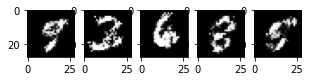

4736.646146833897 3584.646919697523


100%|██████████| 3750/3750 [00:32<00:00, 113.77it/s]


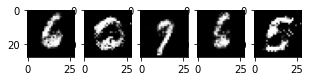

4455.521357536316 3801.090657711029


100%|██████████| 3750/3750 [00:32<00:00, 114.41it/s]


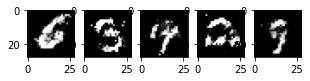

4335.161570191383 3901.696846872568


100%|██████████| 3750/3750 [00:32<00:00, 114.79it/s]


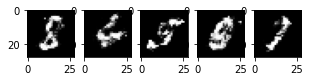

3915.877411544323 4191.0793479681015


100%|██████████| 3750/3750 [00:32<00:00, 113.72it/s]


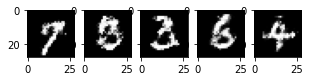

3880.0143737196922 4199.35232937336


100%|██████████| 3750/3750 [00:32<00:00, 114.13it/s]


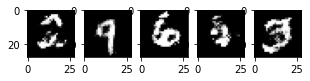

3768.2678157687187 4337.604406118393


100%|██████████| 3750/3750 [00:32<00:00, 114.18it/s]


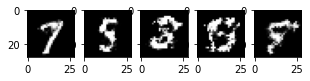

3703.7279708385468 4345.970552265644


100%|██████████| 3750/3750 [00:32<00:00, 114.13it/s]


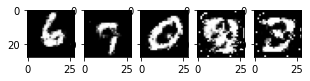

3704.0070662498474 4363.544093668461


100%|██████████| 3750/3750 [00:33<00:00, 113.53it/s]


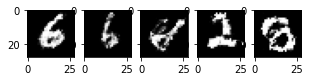

3773.0072902441025 4311.194565176964


100%|██████████| 3750/3750 [00:33<00:00, 113.54it/s]


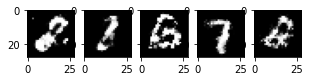

3628.0659607052803 4442.010456740856


100%|██████████| 3750/3750 [00:32<00:00, 113.76it/s]


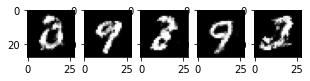

3556.3378699421883 4487.789115071297


100%|██████████| 3750/3750 [00:33<00:00, 113.61it/s]


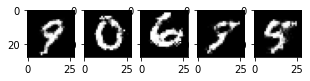

3418.0076858997345 4596.193567037582


100%|██████████| 3750/3750 [00:32<00:00, 113.90it/s]


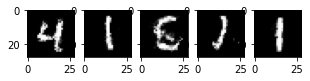

3528.5223281383514 4488.036607027054


100%|██████████| 3750/3750 [00:32<00:00, 113.76it/s]


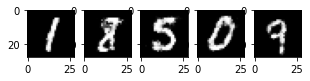

3489.541687965393 4518.1991991996765


100%|██████████| 3750/3750 [00:32<00:00, 113.86it/s]


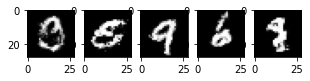

3467.004706799984 4529.000628888607


100%|██████████| 3750/3750 [00:33<00:00, 112.95it/s]


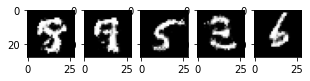

3507.6721237897873 4513.446168541908


100%|██████████| 3750/3750 [00:33<00:00, 113.27it/s]


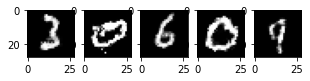

3496.5349905490875 4529.877557694912


100%|██████████| 3750/3750 [00:33<00:00, 113.47it/s]


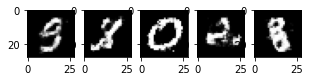

3528.4912379980087 4510.441211462021


100%|██████████| 3750/3750 [00:33<00:00, 113.09it/s]


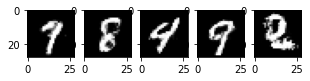

3555.0843701958656 4498.308919608593


100%|██████████| 3750/3750 [00:33<00:00, 113.58it/s]


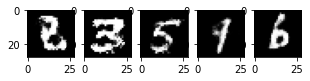

3554.81465870142 4505.947453320026


100%|██████████| 3750/3750 [00:33<00:00, 113.31it/s]


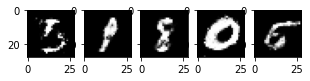

3566.541261613369 4483.698408424854


100%|██████████| 3750/3750 [00:33<00:00, 113.49it/s]


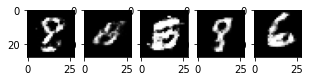

3524.8192051053047 4519.353136897087


100%|██████████| 3750/3750 [00:33<00:00, 113.23it/s]


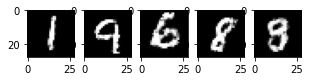

3523.5135201215744 4507.632567167282


100%|██████████| 3750/3750 [00:33<00:00, 113.49it/s]


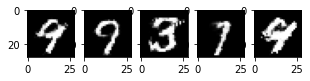

3529.692439675331 4515.051326930523


100%|██████████| 3750/3750 [00:33<00:00, 112.88it/s]


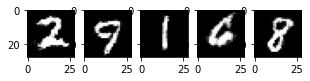

3586.2999856472015 4473.659530043602


 11%|█         | 419/3750 [00:03<00:29, 114.51it/s]

In [ ]:
################################################################################
# train fxn ####################################################################

def train_gan_single_epoch(generator, discriminator, train_loader):
    generator.cuda()
    discriminator.cuda()
    g_optimizer = optim.Adam(generator.parameters(), lr=3e-4)
    d_optimizer = optim.Adam(discriminator.parameters(), lr=3e-4)
    criterion = nn.BCELoss()
    epoch_loss_d, epoch_loss_g = 0, 0
    # update parameters
    for img, label in tqdm(train_loader):
        img, label = img.cuda(), label.cuda()
        b = img.size(0)
        # update discriminator
        d_optimizer.zero_grad()
        prob_real = discriminator(img)
        prob_fake = discriminator(generator(sampler(b, 32).cuda()))
        loss_real = criterion(prob_real, torch.ones(prob_real.size()).cuda())
        loss_fake = criterion(prob_fake, torch.zeros(prob_fake.size()).cuda())
        loss_d = (loss_real + loss_fake)
        loss_d.backward()
        d_optimizer.step()
        epoch_loss_d += loss_d.item()
        # update generator
        g_optimizer.zero_grad()
        prob_fake = discriminator(generator(sampler(b, 32).cuda()))
        loss_g = criterion(prob_fake, torch.ones(prob_fake.size()).cuda())
        loss_g.backward()
        g_optimizer.step()
        epoch_loss_g += loss_g.item()
    plot_10(generator(sampler(b, 32).cuda()))
    return generator, discriminator, epoch_loss_g, epoch_loss_d

################################################################################


#==============================================================================#
# excecute ====================================================================#
g = Generator(z_dim=32)
d = Discriminator()
for epoch_idx in range(200):
    g, d, epoch_loss_g, epoch_loss_d = \
            train_gan_single_epoch(g, d, train_loader)
    print('generator loss: ', epoch_loss_g) 
    print('descriminator loss: 'epoch_loss_d)
#==============================================================================#


## **Plot Generated Images**

In [ ]:
1